## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt

--2021-11-24 14:42:13--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-24 14:42:13--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d34f9b5d931b3c7d04af1e4be.dl.dropboxusercontent.com/cd/0/inline/BakzJB12J-sP8wVOY7Z7VWz8hMQ8cMx66xGYyNzamgsUag0YoGjBgpcDOfEJ-Jpp7axW3zCVkuabQEagRbSemSAxZCImspcmVqRGTvbd2FMPxLJd0AbRzBq0Sn9iiSsBoQ8etG6VCJaplAuGI6IjSbca/file# [following]
--2021-11-24 14:42:13--  https://uc6d34f9b5d931b3c7d04af1e4be.dl.dropboxusercontent.com/cd/0/inline/BakzJB12J-sP8wVOY7Z7VWz8hMQ8cMx66xGYyNzamgsUag0YoGjBgpcDOfEJ-Jpp7axW3zCVkuabQE

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [17]:
import pandas as pd
import numpy as np

In [73]:
#N = 100000
#df = pd.read_csv('./data_000637.txt', nrows=N)
df = pd.read_csv('./data_000637.txt')

2\. Find out the number of BX in a ORBIT (the value 'x').


In [28]:
x = df['BX_COUNTER'].max()
print( 'In a ORBIT there are about {} BX'.format(x))

In a ORBIT there are about 3563 BX


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [44]:
passed_ORBIT = df['ORBIT_CNT'].iloc[-1] - df['ORBIT_CNT'].iloc[0]

data_taking_time = x * passed_ORBIT * 25
print('The data taking lasted about {} ns'.format(data_taking_time))

The data taking lasted about 980181300 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [54]:
df['Abs_time'] = x * df['ORBIT_CNT'] * 25 + df['BX_COUNTER']*25
start = pd.Series(np.ones(len(df['ORBIT_CNT'])) * df['Abs_time'].iloc[0] )
df['Abs_time'] = df['Abs_time'] - start
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs_time
0,1,0,123,3869200167,2374,26,0.0
1,1,0,124,3869200167,2374,27,0.0
2,1,0,63,3869200167,2553,28,4475.0
3,1,0,64,3869200167,2558,19,4600.0
4,1,0,64,3869200167,2760,25,9650.0
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,980141000.0
1310716,1,1,4,3869211171,763,11,980141025.0
1310717,1,0,64,3869211171,764,0,980141050.0
1310718,1,0,139,3869211171,769,0,980141175.0


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [58]:
df['HEAD'] = pd.Series(np.random.randint(low=0, high=2, size=df.shape[0]))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs_time
0,1,0,123,3869200167,2374,26,0.0
1,0,0,124,3869200167,2374,27,0.0
2,0,0,63,3869200167,2553,28,4475.0
3,0,0,64,3869200167,2558,19,4600.0
4,0,0,64,3869200167,2760,25,9650.0
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,980141000.0
1310716,0,1,4,3869211171,763,11,980141025.0
1310717,0,0,64,3869211171,764,0,980141050.0
1310718,1,0,139,3869211171,769,0,980141175.0


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [59]:
df_allones = df[df['HEAD']==1].copy()
df_allones

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs_time
0,1,0,123,3869200167,2374,26,0.0
5,1,0,63,3869200167,2762,4,9700.0
9,1,0,60,3869200167,2788,7,10350.0
10,1,1,7,3869200167,2785,4,10275.0
12,1,1,6,3869200167,2792,18,10450.0
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,980132625.0
1310711,1,1,39,3869211171,430,0,980132700.0
1310712,1,1,35,3869211171,429,4,980132675.0
1310718,1,0,139,3869211171,769,0,980141175.0


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [69]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'TDC Channel')

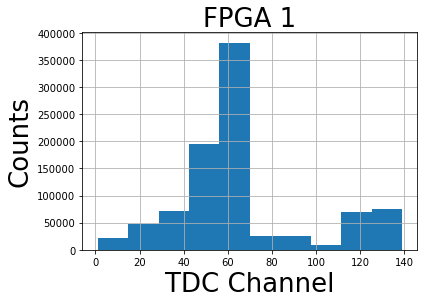

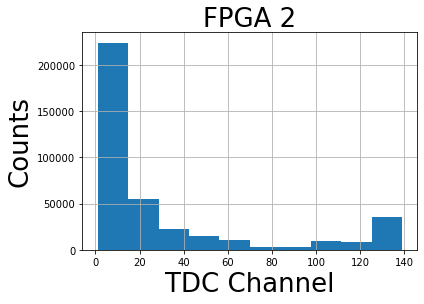

In [79]:
df_fpga0 = df[df['FPGA']==0].copy()
df_fpga1 = df[df['FPGA']==1].copy()

##aggiungere titolo

df_fpga0.hist(['TDC_CHANNEL'])
plt.title('FPGA 1', fontsize=26)
plt.ylabel('Counts', fontsize=26)
plt.xlabel('TDC Channel', fontsize=26)

df_fpga1.hist(['TDC_CHANNEL'])
plt.title('FPGA 2', fontsize=26)
plt.ylabel('Counts', fontsize=26)
plt.xlabel('TDC Channel', fontsize=26)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [97]:
channel_occ = df.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)
noisy_channels = list(channel_occ.take([0,1,2]).index)

print('The most noisy channels are {}, {}, {}'.format(noisy_channels[0],noisy_channels[1], noisy_channels[2]))


The most noisy channels are 139, 64, 63


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [100]:
unique_orbit = df['ORBIT_CNT'].nunique()
uni_orb_channel = df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique()
print('# of unique orbits : ', unique_orbit)
print('# of unique orbits with at least one measurement for TCD channel 139: ', uni_orb_channel)

# of unique orbits :  11001
# of unique orbits with at least one measurement for TCD channel 139:  10976
